<h1><center>Prediction using Topological Data Analysis</center></h1>

Give brief overview of notebook's purpose.
Also maybe add cool picture.

In [27]:
from Topological_ML import TDA_Prediction as tdap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import kmapper as km
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import ensemble

In [2]:
cal_housing = fetch_california_housing()

In [3]:
def numpy_to_pandas(sklearn_data):
    df = pd.DataFrame(data = sklearn_data.data, columns = sklearn_data.feature_names)
    df['response'] = pd.Series(sklearn_data.target)
    return df

df = numpy_to_pandas(cal_housing)

In [4]:
def descriptive_statistic(df, n):
    """
    Provides brief descriptive statistics on dataset. 
    Takes dataframe as input.
    """
    d = dict()
    d['head'] = df.head(n)
    d['shape'] = df.shape
    d['missing values'] = df.isna().sum()
    d['describe'] = df.describe()
    return d

In [5]:
descriptive_statistic(df, 5)

{'head':    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  response  
 0    -122.23     4.526  
 1    -122.22     3.585  
 2    -122.24     3.521  
 3    -122.25     3.413  
 4    -122.25     3.422  ,
 'shape': (20640, 9),
 'missing values': MedInc        0
 HouseAge      0
 AveRooms      0
 AveBedrms     0
 Population    0
 AveOccup      0
 Latitude      0
 Longitude     0
 response      0
 dtype: int64,
 'describe':              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
 count  20640.000000  20640.000000  20640.000000  20640.000000  20640.0

In [6]:
lm = LinearRegression()

ys = df['response']
xs = np.c_[df['MedInc'],df['HouseAge'], df['AveRooms'], df['Population'], df['AveOccup'], df['Latitude'], df['Longitude']]

lm.fit(xs,ys)
ys.shape, xs.shape

((20640,), (20640, 7))

In [7]:
pred = lm.predict(xs)
pred.shape

(20640,)

In [8]:
r2_sk = lm.score(xs,ys)
r2_sk

0.5961995839710023

In [30]:
train, test = train_test_split(df, test_size = .2, random_state = 42)
x_train = train.drop('response', axis = 1)
y_train = train.response

def linear_regression(x, y):
    model = LinearRegression()
    model.fit(x, y)
    return model.score(x ,y)

In [31]:
a = pd.DataFrame({"A": [1,2,3,4,5,6,7,8,9,10]})
b = pd.DataFrame({"B": [2,4,6,8,10,12,14,16,18,20]})
test = linear_regression(a, b)
test

1.0

In [32]:
test = linear_regression(x_train, y_train)
test

0.6125511913966952

### MAPPER

In [11]:
cal_housing = fetch_california_housing()
df = numpy_to_pandas(cal_housing)

features = [c for c in df.columns if c not in ['response']]

X = np.array(df[features])
y = np.array(df.response)

In [12]:
# We create a custom 1-D lens with Isolation Forest
def lens_1d(X, rs, v):
    model = ensemble.IsolationForest(random_state = rs)
    model.fit(X)
    lens1 = model.decision_function(X).reshape((X.shape[0], 1))
    mapper = km.KeplerMapper(verbose = v)
    lens2 = mapper.fit_transform(X, projection="l2norm")
    lens = np.c_[lens1, lens2]
    return lens

In [13]:
lens = lens_1d(X, 1729, 3)

/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (20640, 8)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



In [44]:
a = pd.DataFrame({"A": [0,0]})
lens_1d(a,123,1)

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (2, 1)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


array([[0., 0.],
       [0., 0.]])

In [16]:
# Create the simplicial complex
mapper = km.KeplerMapper(verbose=3)
graph = mapper.map(lens, X, cover=km.Cover(n_cubes=15, perc_overlap=0.4), 
                   clusterer=sklearn.cluster.KMeans(n_clusters=2, random_state=1618033))

KeplerMapper()
Mapping on data shaped (20640, 8) using lens shaped (20640, 2)

Minimal points in hypercube before clustering: 2
Creating 225 hypercubes.
   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_9 is empty.

Cube_10 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_16 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_21 is empty.

Cube_22 is empty.

Cube_23 is empty.

Cube_24 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_31 is empty.

Cube_32 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > 

/Users/shawkmasboob/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 1440x1440 with 0 Axes>

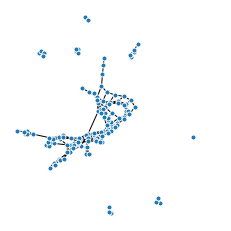

In [17]:
plt.figure(figsize=(20,20))
km.draw_matplotlib(graph)
plt.show()